# imports

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Carga de dados

In [9]:
import pickle

with open('../Bases de dados/risco_credito.pkl', 'rb') as f:  
    X, y = pickle.load(f)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo

In [11]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# Importancia das variaveis
modelo.feature_importances_

array([0.3291922 , 0.11143925, 0.05226266, 0.50710589])

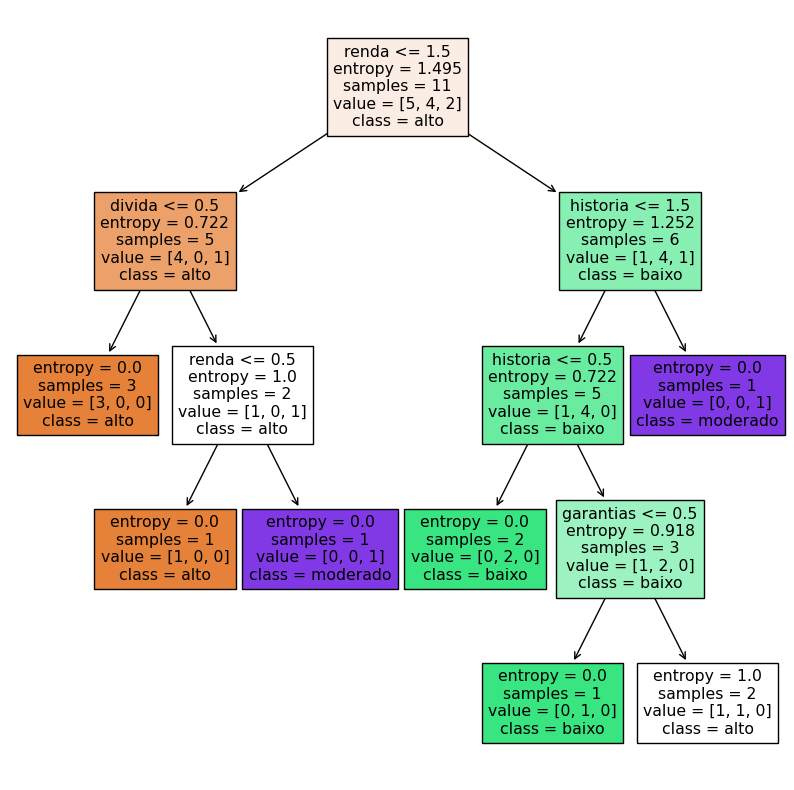

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['historia','divida','garantias', 'renda']
figure, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, 
               feature_names=previsores, 
               class_names=modelo.classes_, 
               filled=True);

# Métrica

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = modelo.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' para multiclasse
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1}')

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n{conf_matrix}')

Acurácia: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1-Score: 0.5555555555555555
Matriz de Confusão:
[[1 0 0]
 [0 1 0]
 [1 0 0]]
